#Predicting Diabetes Project
#Solution Statement:"Use the Machine Learning Workflow to process and transform Pima Indian Diabetes data to create prediction model. This model must predict which people are likely to develop diabetes with 70% or greater accuracy."

In [36]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [37]:
#import dataset
df = pd.read_csv("c:/users/illest_terminal/desktop/data/pima-data.csv")

In [68]:
#prepare data
df.shape

(768, 10)

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


#Definition of features

From the metadata on the data source we have the following definition of the features.

Feature  | Description |  Comments |
num_preg | number of pregnancies
glucose_conc | Plasma glucose concentration a 2 hrs in an oral glucose tolerance test
diastolic_bp | Diastolic blood pressure (mm Hg)
thickness | Thriceps skin fold thickness (mm)
insulin | 2-hr serum insulin (mu U/ml)
diab_pred | Diabetes pedigree function
Age (years) | Age (years)
skin | ?
diabetes | Class variable (1=True, 0=False)

#Eliminate colummns that are not used / no values / duplicates and correlated columns (as they may add bias)

In [7]:
#Check for null values

In [8]:
df.isnull().values.any()

False

In [20]:
def plot_corr(df, size=11):
    """Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
    df: pandas Dataframe
    size: vertical and horizontal size of the plot
    
    Displays:
    matrix of correlation between columns. Blue-Cyan-Yellow-Red-Darkred => less to more correlated
    """
    corr = df.corr()  # data fram correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) #color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) #draw y tick marks

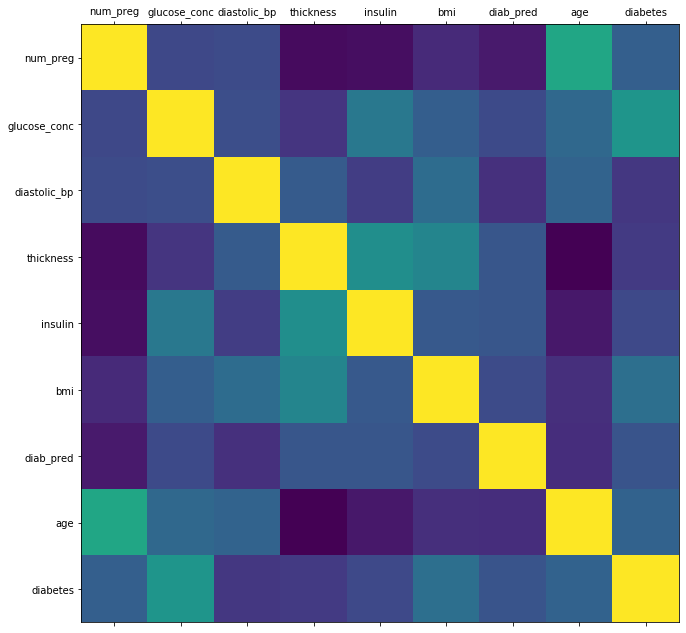

In [21]:
plot_corr(df)

In [13]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [14]:
#delete skin column (too correlated to thickness)

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [16]:
del df['skin']

In [32]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [19]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [22]:
#(Molding Data)

In [23]:
#Check Data Types

In [24]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [26]:
#Change Boolean values to Int values
#Change True to 1, False to 0

In [39]:
diabetes_map = {True : 1, False : 0}

In [40]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [41]:
#Verify changes
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [42]:
#Verified Bool to Int

In [43]:
#Check True/False Ratio
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True Cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false))* 100))
print("Number of False Cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) *100))

Number of True Cases: 268 (34.90%)
Number of False Cases: 500 (65.10%)


In [44]:
#This is a good true/false ratio since the vast majority of the cases are not just one or the other.

#Splitting data
70% for training, 20% for testing

In [47]:
#import split method
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values #predictor feature columns (8 X m)
y= df[predicted_class_names].values #predictor class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

#passed to train, test, split func
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=42)
#test_size = 0.3 is 30%, 42 is answer for everything
#setting split random state to constant ensures that if we run the split function again, it will be identical)

In [48]:
#Check for desired 70% train and 30% test split of data

In [49]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


In [50]:
#Verify predicted value split correctly

In [52]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))                                            

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [53]:
#Percentages preserved when splitting data, therefore accuracy is verified

In [55]:
#Post-split Data Preparation

In [56]:
#Hidden Missing Values

In [57]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [58]:
#found hidden missing values, check other columns

In [59]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [60]:
#almost 50% of data contains missing values
#Cannot ignore due to bias, cannot drop rows
#Can impute with mean or median or replace with derived value
#Use mean imputation

In [64]:
#import imputer class
from sklearn.impute import SimpleImputer

#impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

#fit transform func to create new numpy array with any feature value of 0, replaced by mean of column
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [65]:
#Training initial Algorithm - Naive Bayes

In [67]:
#Import Naive Bayes
from sklearn.naive_bayes import GaussianNB

#create Gaussian Naive Bayes model object
nb_model = GaussianNB()
#call fit method to create model with trained data
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
#Performance on Training Data

In [71]:
#predict values using training data
nb_predict_train = nb_model.predict(X_train)

#import performance metrics library
from sklearn import metrics

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7598



In [72]:
#Performance on Testing Data

In [73]:
#predict values using testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7489


In [74]:
#accuracy is at desired levels for both training and test data

In [75]:
#Verify using Confusion Matrix

In [78]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[121  30]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       151
           1       0.63      0.65      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231



In [80]:
#Interpreting Confusion Matrix
#left column predicted false, right - true
#top row actual false, bottom row actual true
# TN  FP
# FN  TP

In [81]:
#Interpreting Classification Report
#Recall = TP/ (TP +FN)
#Precision = TP/(TP + FP)

In [82]:
#Accuracy does not meet solution statement requirements
#Options: adjust current algorithm, retrieve additional data or make improvments, improve training, or switch algorithms

In [83]:
#Switch Algorithm to Random Forest (Ensemble algorithm based on decision tree)

In [86]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10) # Creates random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [87]:
#Performance on Training Data

In [88]:
rf_predict_train = rf_model.predict(X_train) #training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [89]:
#Performance on Test Data

In [91]:
rf_predict_test = rf_model.predict(X_test) #test metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7316


In [92]:
#Confusion Matrix

In [94]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
#Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[124  27]
 [ 35  45]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       151
           1       0.62      0.56      0.59        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



In [95]:
#Accuracy with training data is much higher than test data - signs of overfitting.

In [96]:
#Switch Algorithm to Logistic Regression

In [99]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#Training Metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))


Accuracy: 0.7359
[[123  28]
 [ 33  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



C:\Users\illest_terminal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
#Setting regularization parameter

1st max value of 0.613 occured at C=1.300


Text(0, 0.5, 'recall score')

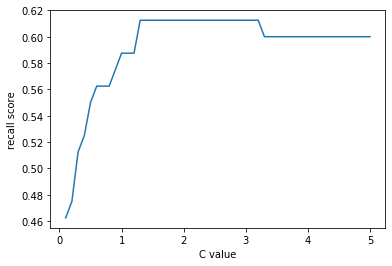

In [101]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [102]:
#Desired recall not obtained

In [103]:
#Logistic Regression using class_weight = 'balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

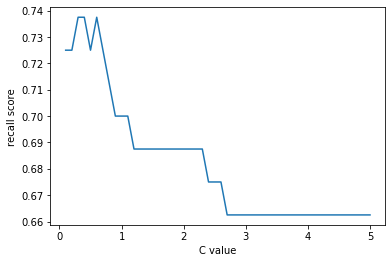

In [104]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [106]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear') #pass class_weight = balanced hyperparameter
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7100
[[105  46]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.56      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


In [107]:
#70% or greater accuracy achieved. 

In [110]:
#Test without using testing data by using K-fold cross validation:

In [111]:
#import LogisticRegressionCV

In [112]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [113]:
#Performance on Test Data

In [115]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

#training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7013
[[109  42]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231

